## VotingRegressor

VotingRegressor to metoda ensemble używana w regresji, która łączy przewidywania wielu różnych modeli w celu poprawy wydajności i stabilności końcowego modelu. Główna idea polega na łączeniu przewidywań kilku modeli bazowych poprzez uśrednianie ich wyników. To proste, ale potężne narzędzie, które może pomóc w uzyskaniu lepszych wyników, szczególnie gdy modele bazowe są różnorodne.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
dane = pd.read_csv('../DataIn/004_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna

In [3]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

In [4]:
voting_model = VotingRegressor(estimators=base_models)
voting_model.fit(X, y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=5)),
                            ('rf', RandomForestRegressor(random_state=42))])

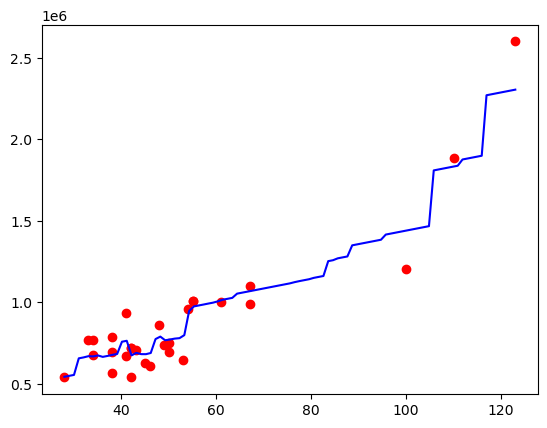

In [5]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = max(X)-min(X))
X_in = np.linspace(np.min(X), np.max(X), (np.max(X)-np.min(X))) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej

prognoza = voting_model.predict(X_in) 

plt.scatter(X, y, color='red') 
plt.plot(X_in, prognoza, color='blue') 
plt.show()